In [7]:
import osmnx as ox, matplotlib.pyplot as plt, numpy as np, geopandas as gpd
ox.config(use_cache=True, log_console=True)
%matplotlib inline

In [14]:
G = ox.graph_from_place('Piedmont, CA, USA', network_type='walk', memory=25000000, retain_all=True)
G = ox.project_graph(G)
gdf = ox.gdf_from_place('Piedmont, CA, USA')
poly = gdf['geometry'].iloc[0]
poly, crs = ox.project_geometry(poly)
poly = poly.buffer(-500)
G_truncated = ox.truncate_graph_polygon(G, poly, retain_all=False, truncate_by_edge=False, 
                                        quadrat_width=1000, buffer_amount=0.01)

In [9]:
# clean up the intersections and extract their xy coords
intersections = ox.clean_intersections(G, tolerance=15, dead_ends=False)
points = np.array([point.xy for point in intersections])

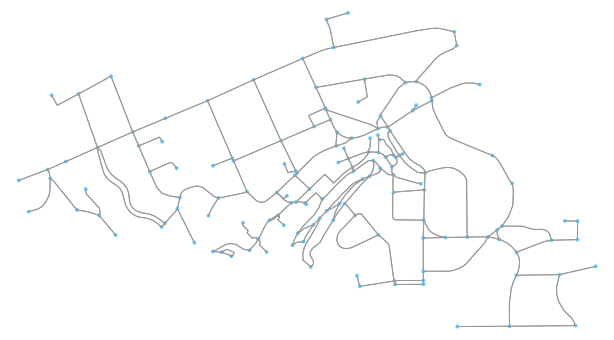

In [10]:
fig, ax = ox.plot_graph(G_truncated)
ax.scatter(x=points[:,0], y=points[:,1], zorder=2, color='#66ccff', edgecolors='k')
plt.show()

In [11]:
gdf = gpd.GeoDataFrame(geometry=intersections)
gdf.crs = G.graph['crs']
ox.project_gdf(gdf, to_latlong=True)

,geometry
0,POINT (-122.2158366 37.81250719999999)
1,POINT (-122.2151674 37.81228939999999)
2,POINT (-122.2149718808644 37.81271770746256)
3,POINT (-122.2198877 37.8135876)
4,POINT (-122.2187545 37.813472)
5,POINT (-122.2170155 37.81398089999999)
6,POINT (-122.2173962 37.8132231)
7,POINT (-122.2166948499973 37.81336585000169)
8,POINT (-122.2239683 37.8143421)
9,POINT (-122.2191988 37.81443429999999)
